<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/Precifica%C3%A7%C3%A3o_de_im%C3%B3veis_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precificação de imóveis com Machine Learning
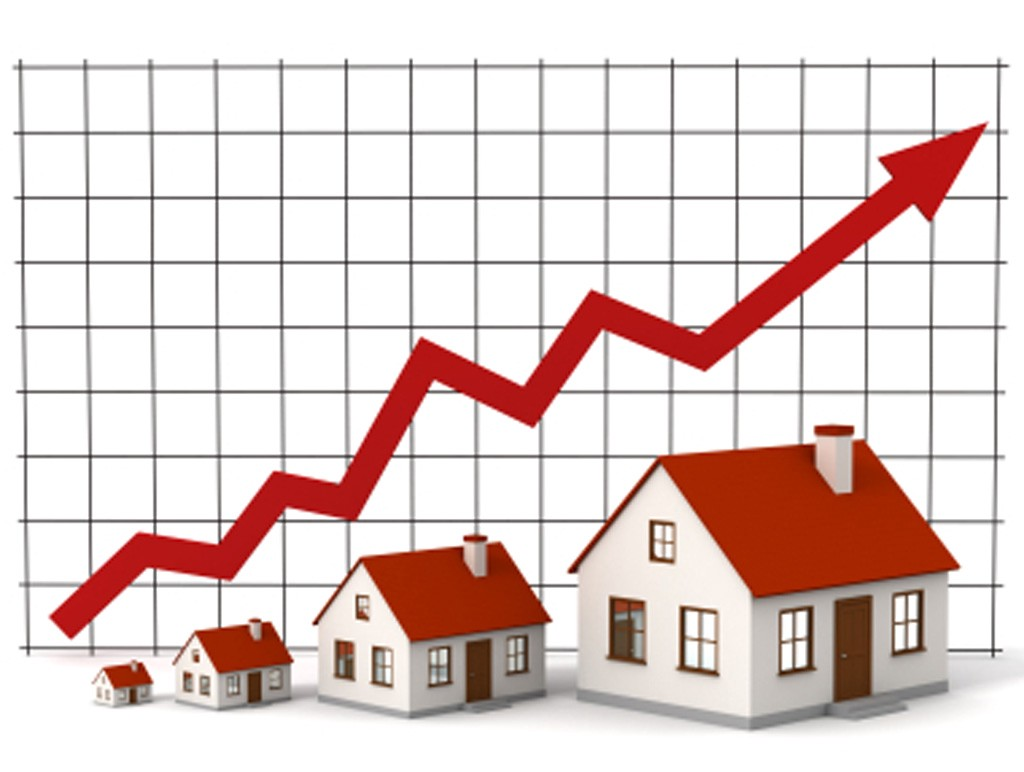

Esse projeto é o desafio de regressão do curso de Ciência de Dados e Machine Learning da Tera

## BIBLIOTECAS

In [40]:
# Nesta primeira parte são reinstalados alguns pacotes por conta da versão que vem no Google Colab.
!pip install category_encoders
!pip install -U scikit-learn==0.24.2
!pip install fast_ml

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# Função para ver até 999 linhas de uma vez
pd.options.display.max_rows = 999

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

In [43]:
base = pd.read_csv('base.csv')

Removendo a coluna Id, pois ela não é relevante para a análise

In [44]:
base.drop('Id', axis = 1, inplace = True)

Analisando o tamanho do DataFrame

In [45]:
base.shape

(1460, 80)

Lendo as primeiras 5 linhas do DataFrame

In [46]:
base.head()

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## TRATAMENTO DOS DADOS NULOS

Analisando o percentual de dados nulos

In [47]:
base.isnull().mean().round(4)*100

ClasseImovel             0.00
ClasseZona               0.00
Fachada                 17.74
TamanhoLote              0.00
Rua                      0.00
Beco                    93.77
FormaProp                0.00
PlanoProp                0.00
Servicos                 0.00
ConfigLote               0.00
InclinacaoLote           0.00
Bairro                   0.00
Estrada1                 0.00
Estrada2                 0.00
TipoHabitacao            0.00
EstiloHabitacao          0.00
Qualidade                0.00
Condicao                 0.00
AnoConstrucao            0.00
AnoReforma               0.00
TipoTelhado              0.00
MaterialTelhado          0.00
Exterior1                0.00
Exterior2                0.00
TipoAlvenaria            0.55
AreaAlvenaria            0.55
QualidadeCobertura       0.00
CondicaoExterna          0.00
TipoFundacao             0.00
AlturaPorao              2.53
CondicaoPorao            2.53
ParedePorao              2.60
TipoAcabPorao1           2.53
AreaAcabPo

Removendo colunas com muitos dados faltantes

In [48]:
df = base.drop(columns= ['Outros', 'QualidadeCerca', 'QualidadePiscina', 'QualdiadeLareira', 'Beco'])

Tratamento das colunas com poucos dados nulos

Função para substituição de dados nulos

In [49]:
def trocar_nulo(coluna):
    df[coluna].fillna(df[coluna].mode()[0], inplace=True)

In [50]:
colunas_nulos = ['Fachada', 'TipoAlvenaria', 'AreaAlvenaria', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'InstalacaoEletrica', 'LocalGaragem', 'AnoGaragem', 'AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem']
for i in colunas_nulos:
  trocar_nulo(i)

In [51]:
df.isnull().sum()

ClasseImovel            0
ClasseZona              0
Fachada                 0
TamanhoLote             0
Rua                     0
FormaProp               0
PlanoProp               0
Servicos                0
ConfigLote              0
InclinacaoLote          0
Bairro                  0
Estrada1                0
Estrada2                0
TipoHabitacao           0
EstiloHabitacao         0
Qualidade               0
Condicao                0
AnoConstrucao           0
AnoReforma              0
TipoTelhado             0
MaterialTelhado         0
Exterior1               0
Exterior2               0
TipoAlvenaria           0
AreaAlvenaria           0
QualidadeCobertura      0
CondicaoExterna         0
TipoFundacao            0
AlturaPorao             0
CondicaoPorao           0
ParedePorao             0
TipoAcabPorao1          0
AreaAcabPorao1          0
TipoAcabPorao2          0
AreaAcabPorao2          0
AreaInacabPorao         0
AreaPorao               0
Aquecimento             0
QualidadeAqu

Selecionando as variáveis 

In [52]:
# Variável de Interesse
target = 'PrecoVenda'

# Variáveis Numéricas
num_var = df.select_dtypes(include = ['int', 'float']).columns.tolist()
num_var.remove('ClasseImovel') #categóricas
num_var.remove(target) 
print(f'São variáveis {len(num_var)} numéricas: {num_var}')

#Variáveis Categóricas
cat_var = df.select_dtypes(exclude = ['int', 'float']).columns.tolist()
cat_var.append('ClasseImovel')
print(f'São {len(cat_var)} variáveis categóricas:: {cat_var}')



São variáveis 35 numéricas: ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
São 39 variáveis categóricas:: ['ClasseZona', 'Rua', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'Qu

##ANÁLISE EXPLORATÓRIA

Distribuição da variável target: "PrecoVenda"

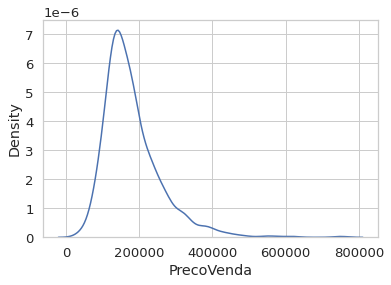

In [53]:
sns.kdeplot(x=df['PrecoVenda']);

Pode-se perceber que a variável target possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa. Assim, medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros. Para amenizar o efeito desse viés, irei aplicar uma transformação logarítmica.

In [54]:
df['LogPrecoVenda'] = np.log(df['PrecoVenda'].values)

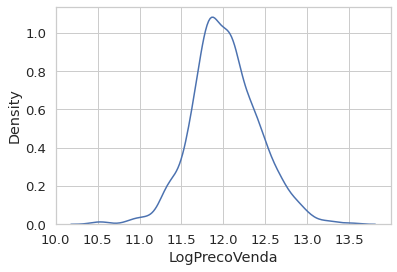

In [55]:
sns.kdeplot(x=df['LogPrecoVenda']);

Agora, podemos ver a correlação entre a variável target e as variáveis numéricas. O coeficiente utilizado é a Correlação de Pearson.

O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. Se a associação entre os elementos não for linear, o coeficiente não será representado adequadamente.

O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui. 

Fonte: https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/#:~:text=O%20coeficiente%20de%20correla%C3%A7%C3%A3o%20de,de%20%2B1%20a%20%2D1.

In [56]:
df.corr()['LogPrecoVenda'].sort_values(ascending = False)

LogPrecoVenda           1.000000
PrecoVenda              0.948374
Qualidade               0.817184
AreaConstruida          0.700927
CarrosGaragem           0.680625
AreaGaragem             0.650888
AreaPorao               0.612134
AreaTerreo              0.596981
Banheiro                0.594771
AnoConstrucao           0.586570
AnoReforma              0.565608
TotalQuartos            0.534422
Lareira                 0.489449
AreaAlvenaria           0.426775
AnoGaragem              0.406004
AreaAcabPorao1          0.372023
AreaDeck                0.334135
Fachada                 0.323534
AreaVarandaAberta       0.321053
Area2Andar              0.319300
Lavabo                  0.313982
TamanhoLote             0.257320
BanheiroPorao           0.236224
AreaInacabPorao         0.221985
BedroomAbvGr            0.209044
AreaAlpendre            0.121208
AreaPiscina             0.069798
MesVenda                0.057329
AreaVaranda3Estacoes    0.054900
AreaAcabPorao2          0.004832
LavaboPora

Verificando a correlação entre as variáveis numéricas através de uma matriz de correlação:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


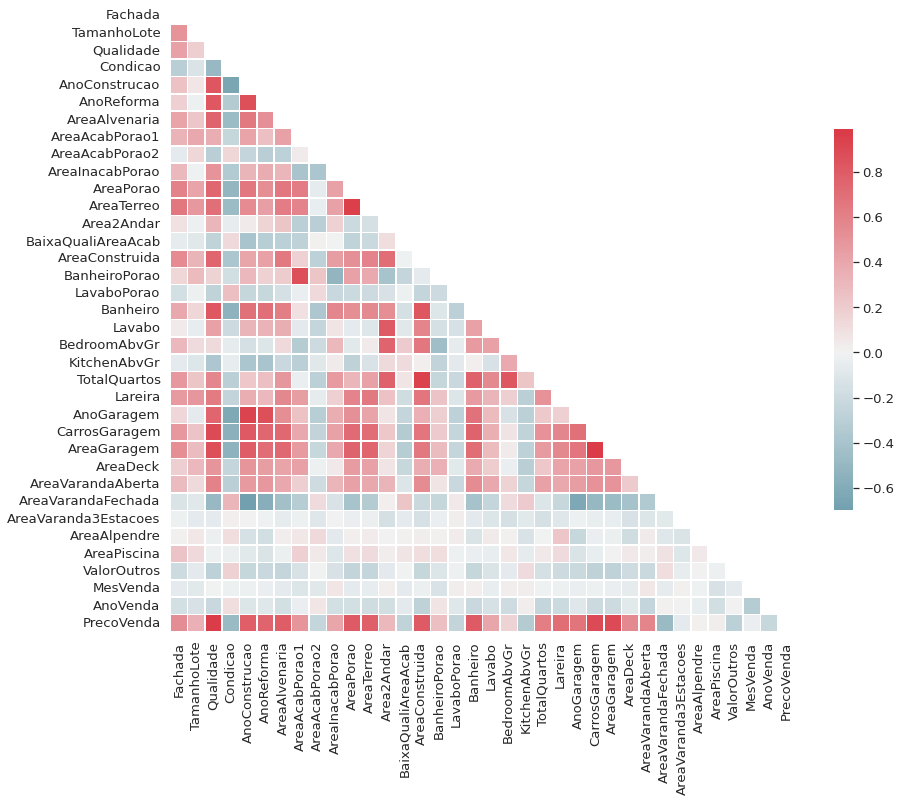

In [57]:
corr_matriz = df[num_var + [target]].corr()

#Funções de formatação da matriz de correlação
def plot_corr_matriz (corr_matriz, size = (14,14)):
  #configuração da figura pelo matplotlib
  fig,ax = plt.subplots(figsize = size)
  #personalizando as cores
  cmap = sns.diverging_palette(220, 10, as_cmap = True)
  #gerando uma máscara para o triângulo superior
  mask = np.triu(np.ones_like(corr_matriz.corr(), dtype = np.bool))
  #plotando o mapa de calor com as cores e tamanho corretos
  sns.heatmap(corr_matriz.corr(), mask = mask, cmap = cmap, vmax = .99, center = 0,
              square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plot_corr_matriz(corr_matriz);

## FEATURE ENGINEERING

Para utilizar a variável "ArCentral" na regressão linear, tranformarei ela em uma variável Dummy.

In [58]:
df = pd.get_dummies(df, columns = ['ArCentral'], drop_first = True)

Além disso, transformarei as variáveis categóricas ordinais que possuem as categorias do tipo "Str" em "Int"

Ex = Excelente

Gd = Bom

TA = Médio / Comum

Fa = Razoável

Po = Ruim

NA = não possui

In [59]:
def condicao_to_num(x):
  if x == 'Ex': return 5
  elif x == 'Gd': return 4
  elif x == 'TA': return 3
  elif x == 'Fa': return 2
  elif x == 'Po': return 1
  elif x == 'NA': return 0

In [60]:
lista_condicao = ['QualidadeGaragem', 
                  'CondicaoGaragem', 
                  'QualidadeAquecimento', 
                  'CondicaoExterna',  
                  'QualidadeCobertura',
                  'AlturaPorao', 
                  'CondicaoPorao', 
                  'QualidadeCozinha']
                 
for i in lista_condicao:
  df[i] = df[i].apply(condicao_to_num)

In [61]:
def qual_serv(x):
  if x == 'AllPub': return 4
  elif x == 'NoSewr': return 3
  elif x == 'NoSeWa': return 2
  elif x == 'ELO': return 1

In [62]:
df['Servicos'] = df['Servicos'].apply(qual_serv)

In [63]:
def inclinacao(x):
  if x == 'Gtl': return 3
  elif x == 'Mod': return 2
  elif x == 'Sev': return 1

In [64]:
df['InclinacaoLote'] = df['InclinacaoLote'].apply(inclinacao)

In [65]:
def estilo(x):
  if x == '1Story': return 1
  elif x == '1.5Unf': return 2
  elif x == '1.5Fin': return 3
  elif x == '2Story': return 4
  elif x == '2.5Unf': return 5
  elif x == '2.5Fin': return 6
  elif x == 'SFoyer': return 0
  elif x == 'SLvl': return 7

In [66]:
df['EstiloHabitacao'] = df['EstiloHabitacao'].apply(estilo)

In [67]:
df['TotBanheiro'] = df['Banheiro'] + df['BanheiroPorao']

##REGRESSÃO LINEAR PARA INTERPRETABILIDADE

Para a regressão linear, utilizarei apenas exemplos onde a condição de venda é normal

In [68]:
df_novo = df[df.CondicaoVenda == 'Normal'].copy()

Treinando a Regressão Linear

In [69]:
# Montando a formula da regressao linear
lr_vars = ["AreaConstruida", "Qualidade", "CarrosGaragem", "AreaPorao", "TotBanheiro", "ArCentral_Y"]
formula ="LogPrecoVenda ~ " + ' + '.join(lr_vars)
print('formula: ', formula)

# Criando o modelo de regressão linear
model = smf.ols(formula = formula, data = df_novo).fit()

# Plotando o sumario do modelo
print(model.summary())

formula:  LogPrecoVenda ~ AreaConstruida + Qualidade + CarrosGaragem + AreaPorao + TotBanheiro + ArCentral_Y
                            OLS Regression Results                            
Dep. Variable:          LogPrecoVenda   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1240.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:24:52   Log-Likelihood:                 688.13
No. Observations:                1198   AIC:                            -1362.
Df Residuals:                    1191   BIC:                            -1327.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------

Interpretação dos Coeficientes da Regressão

In [70]:
round((np.exp(model.params[1:]) - 1)*100, 2)

AreaConstruida     0.02
Qualidade         10.26
CarrosGaragem      8.47
AreaPorao          0.02
TotBanheiro        6.86
ArCentral_Y       24.17
dtype: float64



*   O AUMENTO DE 1 UNIDADE DE ÁREA CONSTRUÍDA, AUMENTA EM 0,02% O PREÇO DO IMÓVEL
*   O AUMENTO DE 1 NÍVEL NA QUALIDADE DO IMÓVEL (DE 1 - MUITO RUIM ATÉ 10 - MUITO EXCELENTE), AUMENTA EM 10,26% O PREÇO DO IMÓVEL
* O AUMENTO DE 1 UNIDADE DA QUANTIDADE DE CARROS QUE CABEM NA GARAGEM, AUMENTA EM 8,47% O PREÇO DO IMÓVEL
* O AUMENTO DE 1 UNIDADE DE ÁREA DO PORÃO, AUMENTA  EM 0,02% O PREÇO DO IMÓVEL
* O AUMENTO DE 1 UNIDADE DE BANHEIROS, AUMENTA EM 6,86% O PREÇO DO IMÓVEL
* TER AR CENTRAL AUMENTA EM 24,17% O PREÇO DO IMÓVEL



##RANDOM FOREST

**O QUE É RANDOM FOREST?**

Floresta aleatória é uma técnica usada em previsões de modelagem e análise de comportamento e é construída em árvores de decisão. Ele contém muitas árvores de decisão que representam uma instância distinta da classificação da entrada de dados na floresta aleatória. A técnica de floresta aleatória leva em consideração as instâncias individualmente, tomando aquela com a maioria dos votos como a previsão selecionada.

Fonte: https://pt.livingeconomyadvisors.com/2606-what-is-random-forest#:~:text=Floresta%20aleat%C3%B3ria%20%C3%A9%20uma%20t%C3%A9cnica,de%20dados%20na%20floresta%20aleat%C3%B3ria.

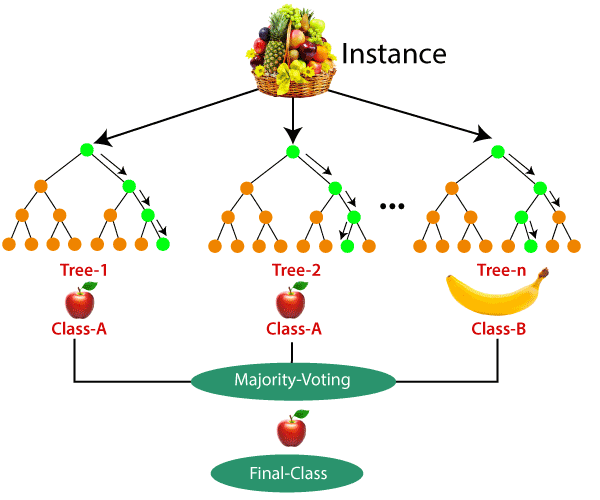

**O QUE É UMA ÁRVORE DE DECISÃO?**

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta.

Fonte: https://blog.somostera.com/data-science/arvores-de-decisao#:~:text=Uma%20%C3%A1rvore%20de%20decis%C3%A3o%20%C3%A9,valor%20do%20lucro%20em%20reais).

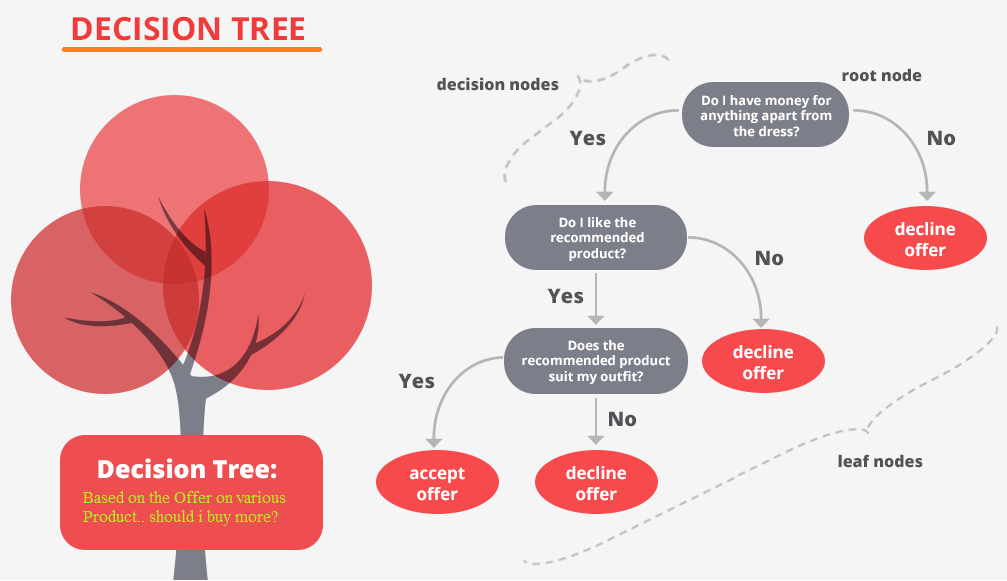

In [71]:
df_arvore = pd.read_csv('base.csv')

Removendo a coluna ID, pois não é relevante para o modelo

In [72]:
df_arvore.drop('Id', axis = 1, inplace = True)

Separando as variáveis numéricas e categóricas

In [73]:
# Variáveis Numéricas
num_var2 = df_arvore.select_dtypes(include = ['int', 'float']).columns.tolist()
num_var2.remove('ClasseImovel') #categóricas
num_var2.remove('PrecoVenda')
print(f'São variáveis {len(num_var)} numéricas: {num_var}')

#Variáveis Categóricas
cat_var2 = df_arvore.select_dtypes(exclude = ['int', 'float']).columns.tolist()
cat_var2.append('ClasseImovel')
print(f'São {len(cat_var)} variáveis categóricas:: {cat_var}')

São variáveis 35 numéricas: ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
São 39 variáveis categóricas:: ['ClasseZona', 'Rua', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'Qu

Dividindo o DataSet em treino e teste

In [74]:
x = df_arvore.drop(columns = 'PrecoVenda')
y = df_arvore['PrecoVenda']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
print(x_train.shape)
print(x_test.shape)

(1021, 79)
(439, 79)


Pré-processamento dos dados

In [75]:
def random_forest_preprocessing(x_train, x_test, y_train):

  # PRÉ- PROCESSAMENTO DOS DADOS CATEGÓRICOS: IMPUT DE DADOS NULOS
  cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  x_train[cat_var2] = cat_imputer.fit_transform(x_train[cat_var2])
  x_test[cat_var2] = cat_imputer.transform(x_test[cat_var2])

  # PRÉ- PROCESSAMENTO DOS DADOS CATEGÓRICOS: IMPUT DE DADOS NULOS
  cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
  x_train[cat_var2] = cat_imputer.fit_transform(x_train[cat_var2])
  x_test[cat_var2] = cat_imputer.transform(x_test[cat_var2])

  # PRÉ- PROCESSAMENTO DOS DADOS CATEGÓRICOS: CATEGORICAL ENCONDERS 
  target_encoder = TargetEncoder()
  x_train[cat_var2] = target_encoder.fit_transform(x_train[cat_var2], y_train)
  x_test[cat_var2] = target_encoder.transform(x_test[cat_var2])

  # PRÉ- PROCESSAMENTO DOS DADOS NUMÉRICOS: IMPUT DE DADOS NULOS
  num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  x_train[num_var2] = num_imputer.fit_transform(x_train[num_var2])
  x_test[num_var2] = num_imputer.transform(x_test[num_var2])

  return x_train, x_test

x_train, x_test = random_forest_preprocessing(x_train.copy(), x_test.copy(), y_train)

Treinando a Árvore

In [76]:
model = RandomForestRegressor(random_state = 0)
model.fit(x_train, y_train)

y_pred =  model.predict(x_test)
y_pred

array([138078.87, 155344.52, 202318.25, 123365.97, 370017.19, 170767.  ,
       283159.26, 106060.36, 153769.9 , 120136.22, 140993.07, 193243.81,
       182476.8 , 278749.75, 175490.33, 121280.88, 152572.  , 144759.35,
       272458.51, 258910.63, 140878.5 , 106981.14, 241668.2 , 157647.  ,
       170917.36, 100902.51, 170188.95, 111820.5 , 326704.29, 320415.41,
       174639.24, 212272.06, 327359.97, 147070.  , 213645.65, 125843.37,
       208340.21, 242282.21, 353672.14, 334095.26, 196077.88, 186289.85,
       169892.82,  84706.14, 179363.57,  80252.15, 186662.7 , 157653.37,
       116296.96,  93092.  , 213411.95, 143470.  , 185251.41, 167492.83,
       170642.75, 190216.56, 412429.12,  86052.51, 162272.74, 111870.51,
       168372.57, 104732.71, 184024.  , 161798.53, 228520.35, 105808.98,
        95569.33, 302821.89, 143252.16, 233989.48,  84119.  , 114907.  ,
       226530.22, 137794.26,  92883.35, 121090.3 , 110446.91, 206056.51,
       362641.85, 117302.24, 261818.27, 141293.87, 

Análise de Métricas

In [77]:
# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [78]:
baseline_report = metrics_report(y_test, y_pred, 'prediction')
baseline_report

,metric,prediction
0,RMSE,29669.31
1,MAE,17593.72
2,R^2,0.86
3,MAPE,0.10
4,Avg. target,180611.07
5,Avg. Prediction,179339.74


##EXPLICANDO AS MÉTRICAS

**MAE**

MAE (mean absolut error): calcula o "erro absoluto médio" dos erros entre valores observados (reais) e predições (hipóteses).
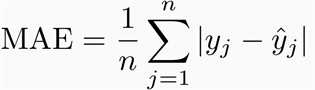

**RMSE**


RMSE (root mean squared error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses).

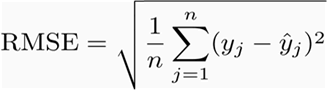

**R²**

A métrica R², também conhecida como R-dois ou coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo. Os resultados variam de 0 a 1, geralmente também são expressos em termos percentuais, ou seja, variando entre 0% e 100%. Quanto maior é o valor de R², mais explicativo é o modelo em relação aos dados previstos. Na equação 2 é mostrado o cálculo desta métrica, no qual y e ŷ os valores reais e previstos, respectivamente, e y-barra representa a média dos valores reais.

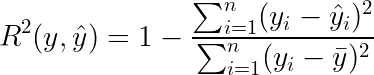

**MAPE**

O erro percentual absoluto médio (MAPE — do inglês Mean Absolute Percentual Error) é uma métrica que mostra a porcentagem de erro em relação aos valores reais. A equação abaixo representa o cálculo de MAPE que basicamente se parece com MAE, mas com o acréscimo de uma divisão por |y|. Então, como o resultado de MAPE do modelo foi igual a 10% significa que **ele faz previsões que em média a diferença entre o valor previsto e o real equivale a 10% do valor real tanto para mais quanto para menos**, o que indica que é um bom modelo.

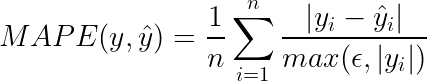

**AVG. TARGET E AVG. PREDICT**

AVG. TARGET é a média da variável target "PrecoVenda", já AVG. PREDICT, é a média dos preços prevista pelo modelo.